In [4]:
#import all the lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import os
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, f1_score, precision_score, \
recall_score, cohen_kappa_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler

#declare color class with color codes
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [6]:
#read event file and show
event_df = pd.read_csv("../data/events.csv", nrows=9000)
event_df.head(8)

FileNotFoundError: [Errno 2] No such file or directory: '../data/events.csv'

In [75]:
#display all the features in event.csv
event_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_odsp        9000 non-null   object 
 1   id_event       9000 non-null   object 
 2   sort_order     9000 non-null   int64  
 3   time           9000 non-null   int64  
 4   text           9000 non-null   object 
 5   event_type     9000 non-null   int64  
 6   event_type2    1957 non-null   float64
 7   side           9000 non-null   int64  
 8   event_team     9000 non-null   object 
 9   opponent       9000 non-null   object 
 10  player         8509 non-null   object 
 11  player2        2787 non-null   object 
 12  player_in      456 non-null    object 
 13  player_out     456 non-null    object 
 14  shot_place     2112 non-null   float64
 15  shot_outcome   2120 non-null   float64
 16  is_goal        9000 non-null   int64  
 17  location       4501 non-null   float64
 18  bodypart

In [76]:
#read and show ginf file
game_df = pd.read_csv("../data/ginf.csv", nrows=9000)
game_df.head(8)

id_odsp                                          link_odsp  adv_stats  \
0  UFot0hit/  /soccer/germany/bundesliga-2011-2012/dortmund-...       True   
1  Aw5DflLH/  /soccer/germany/bundesliga-2011-2012/augsburg-...       True   
2  bkjpaC6n/  /soccer/germany/bundesliga-2011-2012/werder-br...       True   
3  CzPV312a/  /soccer/france/ligue-1-2011-2012/paris-sg-lori...       True   
4  GUOdmtII/  /soccer/france/ligue-1-2011-2012/caen-valencie...       True   
5  lOpzwMkp/  /soccer/germany/bundesliga-2011-2012/hertha-be...       True   
6  M7PhlM2C/  /soccer/france/ligue-1-2011-2012/brest-evian-t...       True   
7  QuWqjrYa/  /soccer/france/ligue-1-2011-2012/ac-ajaccio-to...       True   

         date league  season  country                   ht  \
0  05-08-2011     D1    2012  germany    Borussia Dortmund   
1  06-08-2011     D1    2012  germany          FC Augsburg   
2  06-08-2011     D1    2012  germany        Werder Bremen   
3  06-08-2011     F1    2012   france  Paris Saint-Germain   
4  06-08-2011     F1    2012   france                 Caen   
5  06-08-2011     D1    2012  germany        Hertha Berlin   
6  06-08-2011     F1    2012   france                Brest   
7  06-08-2011     F1    2012   france           AC Ajaccio   

                      at  fthg  ftag  odd_h  odd_d  odd_a  odd_over  \
0             Hamburg SV     3     1   1.56   4.41   7.42       NaN   
1            SC Freiburg     2     2   2.36   3.60   3.40       NaN   
2         Kaiserslautern     2     0   1.83   4.20   4.80       NaN   
3                Lorient     0     1   1.55   4.50   9.40       NaN   
4           Valenciennes     1     0   2.50   3.40   3.45       NaN   
5               Nurnberg     0     1   2.06   3.75   3.95       NaN   
6  Evian Thonon Gaillard     2     2   2.29   3.25   3.85       NaN   
7               Toulouse     0     2   2.80   3.10   3.05       NaN   

   odd_under  odd_bts  odd_bts_n  
0        NaN      NaN        NaN  
1        NaN      NaN        NaN  
2        NaN      NaN        NaN  
3        NaN      NaN        NaN  
4        NaN      NaN        NaN  
5        NaN      NaN        NaN  
6        NaN      NaN        NaN  
7        NaN      NaN        NaN

In [77]:
#display all the features in ginf.csv file
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id_odsp    9000 non-null   object 
 1   link_odsp  9000 non-null   object 
 2   adv_stats  9000 non-null   bool   
 3   date       9000 non-null   object 
 4   league     9000 non-null   object 
 5   season     9000 non-null   int64  
 6   country    9000 non-null   object 
 7   ht         9000 non-null   object 
 8   at         9000 non-null   object 
 9   fthg       9000 non-null   int64  
 10  ftag       9000 non-null   int64  
 11  odd_h      9000 non-null   float64
 12  odd_d      9000 non-null   float64
 13  odd_a      9000 non-null   float64
 14  odd_over   0 non-null      float64
 15  odd_under  0 non-null      float64
 16  odd_bts    0 non-null      float64
 17  odd_bts_n  0 non-null      float64
dtypes: bool(1), float64(7), int64(3), object(7)
memory usage: 1.2+ MB


In [78]:
#merge id_odsp , country, date from both the files
event_df = event_df.merge(game_df[['id_odsp','country','date']], on='id_odsp', how='left')
event_df.head()

id_odsp   id_event  sort_order  time  \
0  UFot0hit/  UFot0hit1           1     2   
1  UFot0hit/  UFot0hit2           2     4   
2  UFot0hit/  UFot0hit3           3     4   
3  UFot0hit/  UFot0hit4           4     7   
4  UFot0hit/  UFot0hit5           5     7   

                                                text  event_type  event_type2  \
0  Attempt missed. Mladen Petric (Hamburg) left f...           1         12.0   
1  Corner,  Borussia Dortmund. Conceded by Dennis...           2          NaN   
2  Corner,  Borussia Dortmund. Conceded by Heiko ...           2          NaN   
3           Foul by Sven Bender (Borussia Dortmund).           3          NaN   
4  Gokhan Tore (Hamburg) wins a free kick in the ...           8          NaN   

   side         event_team           opponent  ... shot_place shot_outcome  \
0     2         Hamburg SV  Borussia Dortmund  ...        6.0          2.0   
1     1  Borussia Dortmund         Hamburg SV  ...        NaN          NaN   
2     1  Borussia Dortmund         Hamburg SV  ...        NaN          NaN   
3     1  Borussia Dortmund         Hamburg SV  ...        NaN          NaN   
4     2         Hamburg SV  Borussia Dortmund  ...        NaN          NaN   

  is_goal location  bodypart  assist_method  situation  fast_break  country  \
0       0      9.0       2.0              1        1.0           0  germany   
1       0      NaN       NaN              0        NaN           0  germany   
2       0      NaN       NaN              0        NaN           0  germany   
3       0      NaN       NaN              0        NaN           0  germany   
4       0      2.0       NaN              0        NaN           0  germany   

         date  
0  05-08-2011  
1  05-08-2011  
2  05-08-2011  
3  05-08-2011  
4  05-08-2011  

[5 rows x 24 columns]

In [79]:
#extract data from a specific year 
year_extraction = lambda x: datetime.strptime(x, "%d-%m-%Y").year
event_df['year'] = [year_extraction(x) for key, x in enumerate(event_df['date'])]
event_df.head()

id_odsp   id_event  sort_order  time  \
0  UFot0hit/  UFot0hit1           1     2   
1  UFot0hit/  UFot0hit2           2     4   
2  UFot0hit/  UFot0hit3           3     4   
3  UFot0hit/  UFot0hit4           4     7   
4  UFot0hit/  UFot0hit5           5     7   

                                                text  event_type  event_type2  \
0  Attempt missed. Mladen Petric (Hamburg) left f...           1         12.0   
1  Corner,  Borussia Dortmund. Conceded by Dennis...           2          NaN   
2  Corner,  Borussia Dortmund. Conceded by Heiko ...           2          NaN   
3           Foul by Sven Bender (Borussia Dortmund).           3          NaN   
4  Gokhan Tore (Hamburg) wins a free kick in the ...           8          NaN   

   side         event_team           opponent  ... shot_outcome is_goal  \
0     2         Hamburg SV  Borussia Dortmund  ...          2.0       0   
1     1  Borussia Dortmund         Hamburg SV  ...          NaN       0   
2     1  Borussia Dortmund         Hamburg SV  ...          NaN       0   
3     1  Borussia Dortmund         Hamburg SV  ...          NaN       0   
4     2         Hamburg SV  Borussia Dortmund  ...          NaN       0   

  location bodypart  assist_method  situation  fast_break  country  \
0      9.0      2.0              1        1.0           0  germany   
1      NaN      NaN              0        NaN           0  germany   
2      NaN      NaN              0        NaN           0  germany   
3      NaN      NaN              0        NaN           0  germany   
4      2.0      NaN              0        NaN           0  germany   

         date  year  
0  05-08-2011  2011  
1  05-08-2011  2011  
2  05-08-2011  2011  
3  05-08-2011  2011  
4  05-08-2011  2011  

[5 rows x 25 columns]

In [80]:
#take shot data of player
df_shots = event_df[event_df.event_type == 1]
df_shots_player = df_shots.loc[: , ('player')]
df_shots_player.head()

0         mladen petric
11        shinji kagawa
13    kevin grosskreutz
14         mats hummels
17         tomas rincon
Name: player, dtype: object

In [81]:
#filter shot data of player 2
df_shots_player2 = df_shots.loc[: , ('player2')]
df_shots_player2.head()

0     gokhan tore
11    mario gotze
13    mario gotze
14            NaN
17            NaN
Name: player2, dtype: object

In [82]:
#filer data on the basics of country
df_shots_country = df_shots.loc[: , ('country')]
df_shots_country.head()

0     germany
11    germany
13    germany
14    germany
17    germany
Name: country, dtype: object

In [83]:
#select features from df_shot to make a pie chart
pie = df_shots[['shot_outcome','id_event']].groupby('shot_outcome').count().reset_index().rename(columns={'id_event':'count'})
pie.head()

shot_outcome  count
0           1.0    755
1           2.0    849
2           3.0    486
3           4.0     30

In [84]:
#convert data into integer value
pie.shot_outcome = pie.shot_outcome.astype(int)
#add tages for pie chart
pie.shot_outcome = pie.shot_outcome.replace({1:'On Traget', 2: 'Off Target', 3: 'Blocked', 4: 'Hit the Bar'})

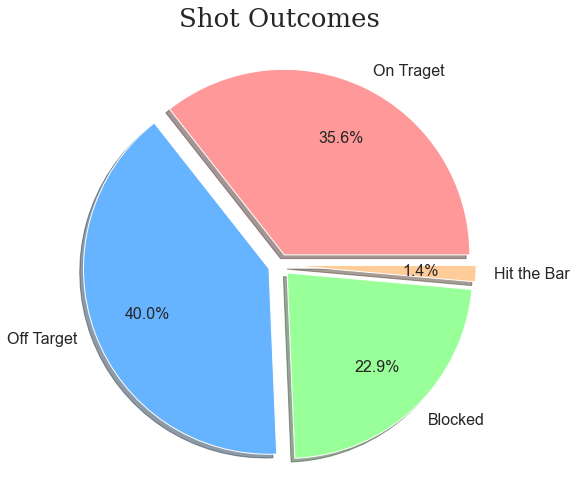

In [85]:
#plot a pie chart
fig, ax = plt.subplots(figsize=[8,8])
labels = pie['shot_outcome']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(x=pie['count'], autopct="%.1f%%", labels=labels, explode=[0.06]*4, pctdistance=0.7, colors=colors, shadow=True, \
       textprops=dict(fontsize=16))
plt.title("Shot Outcomes", fontsize=26, fontfamily='serif')
plt.tight_layout()
plt.show()

In [86]:
#declare parameters that use in a fotball game 
bar = df_shots[['shot_place', 'id_event']].groupby('shot_place').count().reset_index().rename(columns={'id_event': 'count'})
bar.shot_place = bar.shot_place.astype(int)
bar.shot_place = bar.shot_place.replace({1: 'Bit too high', 2: 'Blocked', 3: 'Bottom left corner', 4: 'Bottom right corner', \
                                        5: 'Centre of the goal', 6: 'High and wide', 7: 'Hits the bar', 8: 'Misses to the left', \
                                        9: 'Misses to the right', 10: 'Too high', 11: 'Top centre of the goal', \
                                        12: 'Top left corner', 13: 'Top right corner'})

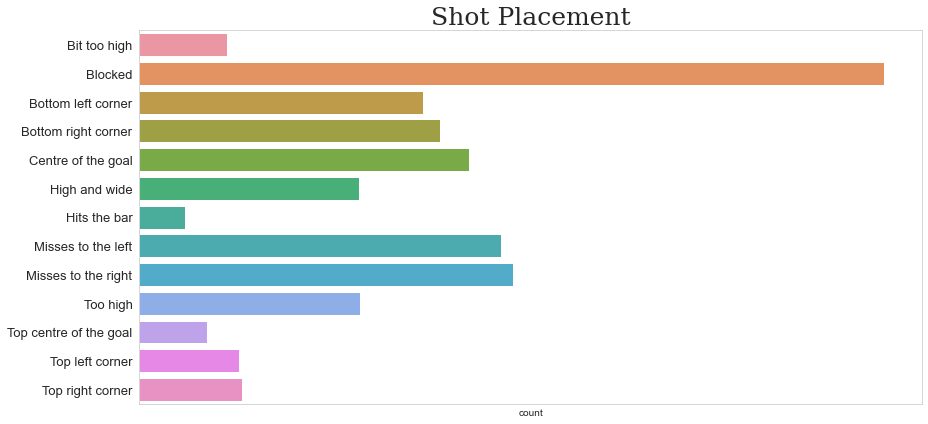

In [87]:
#plot bar graph to show shot placement (which position have more shot possible)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=[13,6])
labels = bar['shot_place']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax = sns.barplot(x=bar['count'], y=labels)
ax.set_yticklabels(labels, size = 13)
ax.set_xticks(np.arange(1000,7000,15000))
ax.set_ylabel(ylabel='')
plt.title("Shot Placement", fontsize=25, fontfamily='serif')
plt.tight_layout()
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='x')
plt.show()

In [88]:
#filter goals data according to event, goal and Country 
goals  = df_shots[['is_goal', 'id_event', 'country']].groupby(['is_goal', 'country']).count().reset_index().rename(columns={'id_event': 'count'})
goals.is_goal = goals.is_goal.replace({1: 'Goal', 0: 'No Goal'})
goals.head()

is_goal  country  count
0  No Goal   france    874
1  No Goal  germany    839
2  No Goal    spain    188
3     Goal   france    100
4     Goal  germany    100

In [89]:
#change data of goals into percentage
goals['percentage']=0
for i in range(len(goals)): 
    for country in goals.country.unique():
        if goals.iloc[i, goals.columns.get_loc("country")] == country:
            goals.iloc[i,goals.columns.get_loc("percentage")]=goals.iloc[i,goals.columns.get_loc("count")] / \
                                                            goals[goals.country==country]['count'].sum()
goals['percentage']=round(goals['percentage']*100,2)

In [90]:

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}%'.format(p.get_height())
            ax.text(_x, _y+2, value, ha="center", fontsize=14) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

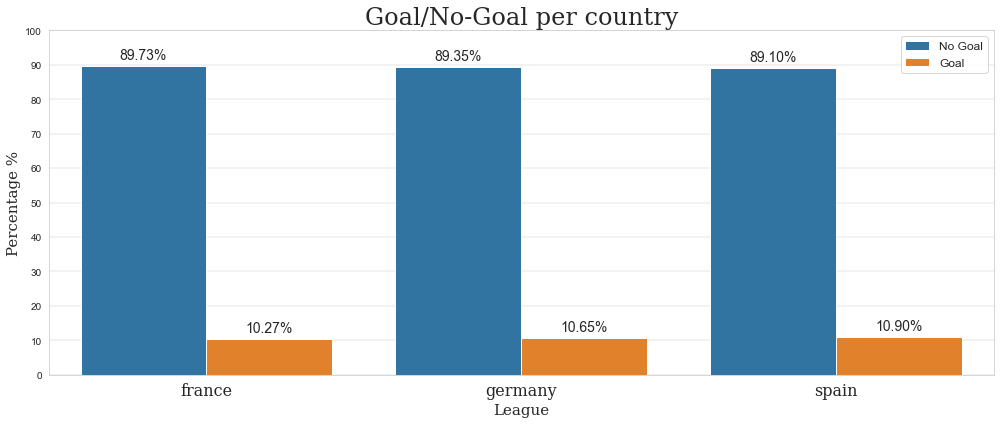

In [91]:
#plot bar graph according to goals per country
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=[14,6])
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax = sns.barplot(data=goals, y='percentage', hue='is_goal', x='country')
ax.set_yticks(np.arange(0,110,10))
ax.set_ylabel(ylabel='Percentage %', fontsize=15, fontfamily='serif')
ax.set_xlabel(xlabel='League', fontsize=15, fontfamily='serif')
ax.set_xticklabels(labels=ax.get_xticklabels(), fontsize=16, fontfamily='serif')
plt.title("Goal/No-Goal per country", fontsize=24, fontfamily='serif')
plt.tight_layout()
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='y')
plt.legend(fontsize=12)
show_values_on_bars(ax)
plt.show()

In [92]:
#assign goals value as 1 and no goal as 0
goals  = df_shots[['is_goal', 'id_event', 'year']].groupby(['is_goal', 'year']).count().reset_index().rename(columns={'id_event': 'count'})
goals.is_goal = goals.is_goal.replace({1: 'Goal', 0: 'No Goal'})
goals.head()

is_goal  year  count
0  No Goal  2011   1901
1     Goal  2011    223

In [93]:
goals['percentage']=0
for i in range(len(goals)):
    for year in goals.year.unique():
        if goals.iloc[i,goals.columns.get_loc("year")]==year:
            goals.iloc[i,goals.columns.get_loc("percentage")]=goals.iloc[i,goals.columns.get_loc("count")] / \
                                                            goals[goals.year==year]['count'].sum()
goals['percentage']=round(goals['percentage']*100,2)

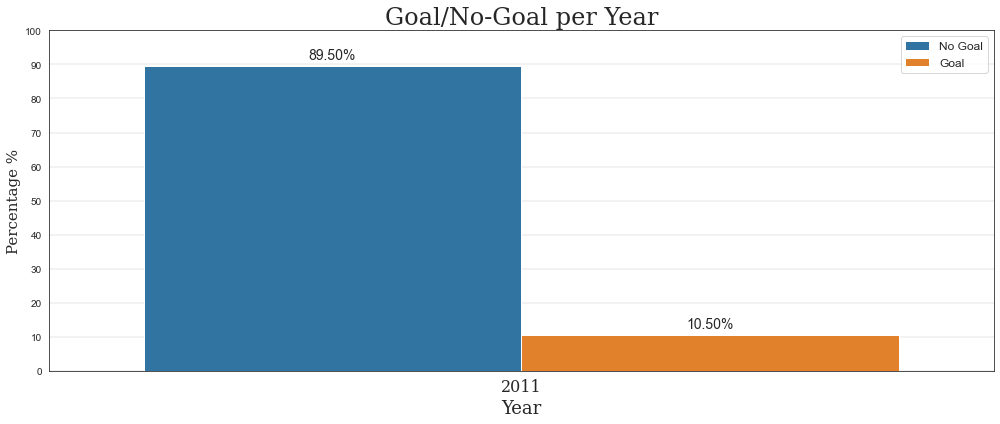

In [94]:
#data of 2011 of goals and plot bar graph
sns.set_style("white")
fig, ax = plt.subplots(figsize=[14,6])
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax = sns.barplot(data=goals, y='percentage', hue='is_goal', x='year')
ax.set_yticks(np.arange(0,110,10))
ax.set_ylabel(ylabel='Percentage %', fontsize=15, fontfamily='serif')
ax.set_xlabel(xlabel='Year', fontsize=18, fontfamily='serif')
ax.set_xticklabels(labels=ax.get_xticklabels(), fontsize=16, fontfamily='serif')
plt.title("Goal/No-Goal per Year", fontsize=24, fontfamily='serif')
plt.tight_layout()
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='y')
plt.legend(fontsize=12)
show_values_on_bars(ax)
plt.show()

In [95]:
#xG Model
#taking data of shot with shot locations and angles

data = pd.get_dummies(df_shots.iloc[:,-8:-3], columns=['location', 'bodypart','assist_method', 'situation'])
data.columns = ['fast_break', 'loc_centre_box', 'loc_diff_angle_lr', 'diff_angle_left', 'diff_angle_right',
                'left_side_box', 'left_side_6ybox', 'right_side_box', 'right_side_6ybox', 'close_range',
                'penalty', 'outside_box', 'long_range', 'more_35y', 'more_40y', 'not_recorded', 'right_foot', 
                'left_foot', 'header', 'no_assist', 'assist_pass', 'assist_cross', 'assist_header',
                'assist_through_ball', 'open_play', 'set_piece', 'corner', 'free_kick']
data['is_goal'] = df_shots['is_goal']

In [96]:
print(len(data))
print(data.is_goal.sum())
print(len(data.columns)-1)

2124
223
28


In [97]:
#declare variables for train test
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

In [98]:
#Gradient Boosting Classifier

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials


def evaluate_model(params): 
    model = GradientBoostingClassifier(
                        learning_rate=params['learning_rate'],
                        min_samples_leaf=params['min_samples_leaf'],
                        max_depth = params['max_depth'],
                        max_features = params['max_features']
                        )

    model.fit(X_train, y_train)
    return {
        'learning_rate': params['learning_rate'],
        'min_samples_leaf': params['min_samples_leaf'],
        'max_depth': params['max_depth'],
        'max_features': params['max_features'],
        'train_ROCAUC': roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
        'test_ROCAUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]),
        'recall': recall_score(y_test, model.predict(X_test)),
        'precision': precision_score(y_test, model.predict(X_test)),
        'f1_score': f1_score(y_test, model.predict(X_test)),
        'train_accuracy': model.score(X_train, y_train),
        'test_accuracy': model.score(X_test, y_test),
    }

def objective(params):
    res = evaluate_model(params)
    
    res['loss'] = - res['test_ROCAUC'] # Esta loss es la que hyperopt intenta minimizar
    res['status'] = STATUS_OK # Asi le decimos a hyperopt que el experimento salio bien
    return res 

hyperparameter_space = {
        'learning_rate': hp.uniform('learning_rate', 0.05, 0.3),
        'min_samples_leaf': hp.choice('min_samples_leaf', range(15, 200)),
        'max_depth': hp.choice('max_depth', range(2, 20)),
        'max_features': hp.choice('max_features', range(3, 27))
}


In [99]:
trials = Trials()
fmin(
    objective,
    space=hyperparameter_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials
);

  8%|███▊                                            | 4/50 [00:00<00:06,  6.60trial/s, best loss: -0.7718849016284725]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 14%|██████▋                                         | 7/50 [00:01<00:05,  7.58trial/s, best loss: -0.7718849016284725]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 32%|███████████████                                | 16/50 [00:02<00:04,  7.91trial/s, best loss: -0.7718849016284725]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 40%|██████████████████▊                            | 20/50 [00:02<00:03,  7.99trial/s, best loss: -0.7718849016284725]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 56%|██████████████████████████▎                    | 28/50 [00:03<00:02,  8.07trial/s, best loss: -0.7718849016284725]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 74%|██████████████████████████████████▊            | 37/50 [00:04<00:01,  7.16trial/s, best loss: -0.7718849016284725]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 82%|██████████████████████████████████████▌        | 41/50 [00:05<00:01,  8.13trial/s, best loss: -0.7718849016284725]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



100%|███████████████████████████████████████████████| 50/50 [00:06<00:00,  7.66trial/s, best loss: -0.7718849016284725]


In [100]:
pd.DataFrame(trials.results).sort_values(by='f1_score', ascending=False).head(5)

learning_rate  min_samples_leaf  max_depth  max_features  train_ROCAUC  \
6        0.146398                18          9             3      0.859676   
49       0.150886                29         11             9      0.850394   
21       0.211114                18         14             3      0.867850   
0        0.055639                30         14            19      0.845042   
24       0.243519                28         16            26      0.867870   

    test_ROCAUC    recall  precision  f1_score  train_accuracy  test_accuracy  \
6      0.771286  0.243902   0.666667  0.357143        0.921739       0.903226   
49     0.771314  0.243902   0.625000  0.350877        0.918841       0.900538   
21     0.770734  0.231707   0.655172  0.342342        0.920290       0.901882   
0      0.771885  0.231707   0.633333  0.339286        0.913043       0.900538   
24     0.751124  0.219512   0.580645  0.318584        0.920290       0.896505   

        loss status  
6  -0.771286     ok  
49 -0.771314     ok  
21 -0.770734     ok  
0  -0.771885     ok  
24 -0.751124     ok

In [101]:
model = GradientBoostingClassifier(
                        learning_rate=0.285508,
                        min_samples_leaf=99,
                        max_depth = 19,
                        max_features = 7
                        )
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.285508, max_depth=19, max_features=7,
                           min_samples_leaf=99)

In [102]:
#Using logistic regration for train data
model = LogisticRegression(max_iter=400)
model.fit(X_train, y_train)

LogisticRegression(max_iter=400)

In [103]:
print('The test set contains {} examples (shots) of which {} are positive (goals).'.format(len(y_test), y_test.sum()))
print('The accuracy of classifying whether a shot is goal or not is {}%.'.format(round(model.score(X_test, y_test)*100),2))
print('Our classifier obtains an ROC-AUC of {}%'.format(round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])*100),2))

The test set contains 744 examples (shots) of which 82 are positive (goals).
The accuracy of classifying whether a shot is goal or not is 90%.
Our classifier obtains an ROC-AUC of 77%


In [104]:
print('The baseline performance for PR-AUC is {}%. This is the PR-AUC that what we would get by random guessing.'.format(round(y_train.mean(),2)))
print('Our model obtains an PR-AUC of {}%.'.format(round(average_precision_score(y_test, model.predict_proba(X_test)[:, 1])*100,2)))
print('Our classifier obtains a Cohen Kappa of {}.'.format(round(cohen_kappa_score(y_test,model.predict(X_test)),2)))

The baseline performance for PR-AUC is 0.1%. This is the PR-AUC that what we would get by random guessing.
Our model obtains an PR-AUC of 42.98%.
Our classifier obtains a Cohen Kappa of 0.26.


In [105]:
print(color.BOLD + color.YELLOW + color.UNDERLINE + 'Confusion Matrix:\n' + color.END)
print(confusion_matrix(y_test,model.predict(X_test)))
print(color.BOLD +  color.YELLOW + color.UNDERLINE + '\n Report:' + color.END)
print(classification_report(y_test,model.predict(X_test)))

Confusion Matrix:

[[653   9]
 [ 66  16]]

 Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       662
           1       0.64      0.20      0.30        82

    accuracy                           0.90       744
   macro avg       0.77      0.59      0.62       744
weighted avg       0.88      0.90      0.87       744



In [106]:
model = GradientBoostingClassifier(
                        learning_rate=0.285508,
                        min_samples_leaf=99,
                        max_depth = 19,
                        max_features = 7
                        )
model.fit(X_train, y_train)



GradientBoostingClassifier(learning_rate=0.285508, max_depth=19, max_features=7,
                           min_samples_leaf=99)

In [108]:
if not os.path.isfile("../data/TrainData.pkl"):
    df_shots.iloc[:int(df_shots.shape[0]*0.80)].to_pickle("../data/TrainData.pkl")
    Train_Data = pd.read_pickle("../data/TrainData.pkl")
    Train_Data.reset_index(drop = True, inplace = True)
else:
    Train_Data = pd.read_pickle("../data/TrainData.pkl")
    Train_Data.reset_index(drop = True, inplace = True)

if not os.path.isfile("../data/TestData.pkl"):
    df_shots.iloc[int(df_shots.shape[0]*0.80):].to_pickle("../data/TestData.pkl")
    Test_Data = pd.read_pickle("../data/TestData.pkl")
    Test_Data.reset_index(drop = True, inplace = True)
else:
    Test_Data = pd.read_pickle("../data/TestData.pkl")
    Test_Data.reset_index(drop = True, inplace = True)

In [39]:
import eli5
eli5.explain_weights(model, feature_names=list(X_train.columns))

Explanation(estimator='GradientBoostingClassifier(learning_rate=0.285508, max_depth=19, max_features=7,\n                           min_samples_leaf=99)', description='\nRandom forest feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='outside_box', weight=0.281657969030346, std=0.22765132704726607, value=None), FeatureWeight(feature='open_play', weight=0.18867183025206852, std=0.27387206985155976, value=None), FeatureWeight(feature='loc_centre_box', weight=0.12533585003006606, std=0.16603079028593942, value=None), FeatureWeight(feature='no_assist', weight=0.11395150459178305, std=0.14975100301851366, value=None), FeatureWeight(feature='header', weight=0.0874657846208954, std=0.1656132545202698, value=None), FeatureWeight(feature='assist_pass', weight=0.05503670698854574, std=0.1398972560483017, value=None), FeatureWeight(feature='corner', weight=0.041897412397108286, std=0.20014402194059924, value=None), FeatureWeight(feature='left_side_box', weight=0.03370108325029495, std=0.09687938206057066, value=None), FeatureWeight(feature='right_side_box', weight=0.03353514027249348, std=0.07508709039973027, value=None), FeatureWeight(feature='right_foot', weight=0.020348843343639428, std=0.15257097000126643, value=None), FeatureWeight(feature='left_foot', weight=0.01144894975959891, std=0.19763827358760452, value=None), FeatureWeight(feature='assist_cross', weight=0.006948925463160098, std=0.169100262245372, value=None), FeatureWeight(feature='loc_diff_angle_lr', weight=0.0, std=0.0, value=None), FeatureWeight(feature='diff_angle_left', weight=0.0, std=0.0, value=None), FeatureWeight(feature='fast_break', weight=0.0, std=0.0, value=None), FeatureWeight(feature='left_side_6ybox', weight=0.0, std=0.0, value=None), FeatureWeight(feature='right_side_6ybox', weight=0.0, std=0.0, value=None), FeatureWeight(feature='close_range', weight=0.0, std=0.0, value=None), FeatureWeight(feature='diff_angle_right', weight=0.0, std=0.0, value=None), FeatureWeight(feature='free_kick', weight=0.0, std=0.0, value=None)], remaining=8), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [40]:
df_shots['prediction'] = model.predict_proba(X)[:, 1]
df_shots['difference'] = df_shots['prediction'] - df_shots['is_goal']

C:\Users\Rahul\AppData\Local\Temp/ipykernel_13676/730347002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shots['prediction'] = model.predict_proba(X)[:, 1]
C:\Users\Rahul\AppData\Local\Temp/ipykernel_13676/730347002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shots['difference'] = df_shots['prediction'] - df_shots['is_goal']


In [41]:
#Which players are the best finishers
players = df_shots.groupby('player').sum().reset_index()
players.rename(columns={'is_goal': 'trueGoals', 'prediction': 'expectedGoals'}, inplace=True)
players.expectedGoals = round(players.expectedGoals,2)
players.difference = round(players.difference,2)
players['ratio'] = players['trueGoals'] / players['expectedGoals']

In [42]:
print(round(players.expectedGoals.corr(players.trueGoals),3))

0.677


In [43]:
show = players.sort_values(['difference', 'trueGoals']).reset_index(drop=True)
show['rank'] = show.index+1
show = show[['rank', 'player', 'difference', 'trueGoals', 'expectedGoals']].head(10)
show.head(5)

rank              player  difference  trueGoals  expectedGoals
0     1        alain traore       -3.12          5           1.88
1     2     roberto soldado       -2.46          4           1.54
2     3  papiss demba cisse       -2.39          4           1.61
3     4        brice jovial       -2.29          3           0.71
4     5       kevin gameiro       -1.93          3           1.07

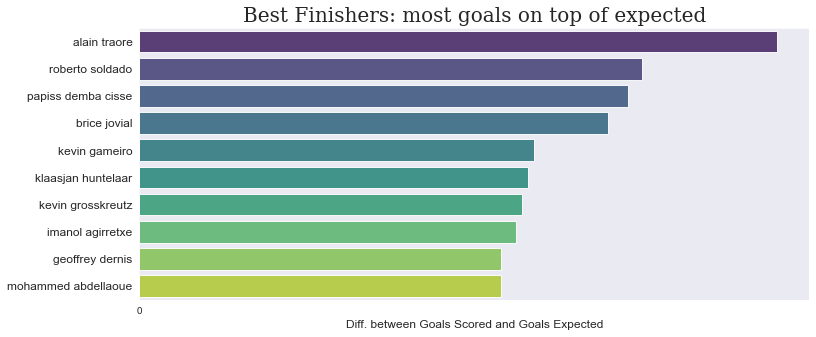

In [44]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=[12,5])
ax = sns.barplot(x=abs(show['difference']), y=show['player'], palette='viridis', alpha=0.9)
ax.set_xticks(np.arange(0,45,65))
ax.set_xlabel(xlabel='Diff. between Goals Scored and Goals Expected', fontsize=12)
ax.set_ylabel(ylabel='')
ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=12)
plt.title("Best Finishers: most goals on top of expected", fontsize=20, fontfamily='serif')
ax.grid(color='black', linestyle='-', linewidth=0.1, alpha=0.8, axis='x')
plt.show()

In [45]:
show = players[players['trueGoals']>2].sort_values(['ratio', 'trueGoals'], ascending=False).reset_index(drop=True)
show['rank'] = show.index+1
show = show[['rank', 'player', 'ratio', 'trueGoals', 'expectedGoals']].head(10)
show.head(5)

rank             player     ratio  trueGoals  expectedGoals
0     1       brice jovial  4.225352          3           0.71
1     2      kevin gameiro  2.803738          3           1.07
2     3       alain traore  2.659574          5           1.88
3     4  kevin grosskreutz  2.654867          3           1.13
4     5    roberto soldado  2.597403          4           1.54

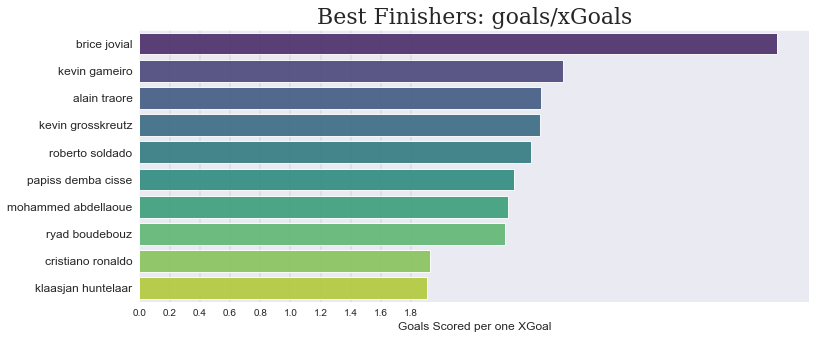

In [46]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=[12,5])
ax = sns.barplot(x=show['ratio'], y=show['player'], palette='viridis', alpha=0.9)
ax.set_xticks(np.arange(0,1.9,0.2))
ax.set_xlabel(xlabel='Goals Scored per one XGoal', fontsize=12)
ax.set_ylabel(ylabel='')
ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=12)
plt.title("Best Finishers: goals/xGoals", fontsize=22, fontfamily='serif')
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='x')
plt.show()

In [47]:
players_per_year = df_shots.groupby(['year', 'country', 'player']).sum().reset_index()
players_per_year.rename(columns={'is_goal': 'trueGoals', 'prediction': 'expectedGoals'}, inplace=True)
players_per_year.expectedGoals = round(players_per_year.expectedGoals,2)
players_per_year.difference = round(players_per_year.difference,2)
players_per_year['ratio'] = players_per_year['trueGoals'] / players_per_year['expectedGoals']
players_per_year['ratio'] = round(players_per_year.ratio, 2)

In [48]:
def best_finishers_per_year(years, leagues, min_goals, df):
    years_res=[]; leagues_res=[]; players_res=[]; ratio_res=[]; goals=[]
    players_per_year = df[df['trueGoals']>min_goals]
    for league in leagues:
        for year in years:
            results = players_per_year[(players_per_year['year']==year) & (players_per_year['country']==league)].sort_values(by='ratio', ascending=False).reset_index(drop=True)
            results['rank'] = results.index + 1
            if len(results)>0:
                years_res.append(year)
                leagues_res.append(league)
                players_res.append(results[results['rank']==1]['player'].iloc[0])
                ratio_res.append(results[results['rank']==1]['ratio'].iloc[0])
                goals.append(results[results['rank']==1]['trueGoals'].iloc[0])
    return years_res, leagues_res, players_res, ratio_res, goals

In [49]:
years, leagues, players_res, ratio, goals = best_finishers_per_year(years = players_per_year.year.unique(), leagues=players_per_year.country.unique(),\
                       min_goals=1, df=players_per_year)

In [50]:
results_perYear = pd.DataFrame()
results_perYear['League']=leagues
results_perYear['Year']=years
results_perYear['bestFinisher']=players_res
results_perYear['Goals']=goals
results_perYear['Goals/xGoals Ratio']=ratio
results_perYear

League  Year      bestFinisher  Goals  Goals/xGoals Ratio
0   france  2011   geoffrey dernis      2                 8.7
1  germany  2011      heungmin son      2                 6.9
2    spain  2011  imanol agirretxe      2                12.5

In [51]:
show = players.sort_values(['difference', 'trueGoals']).reset_index(drop=True)
show['rank'] = show.index+1
show = show[['rank', 'player', 'difference', 'trueGoals', 'expectedGoals']].tail(10)
show.tail(3)

rank          player  difference  trueGoals  expectedGoals
573   574   gregory pujol        1.32          0           1.32
574   575  andre schurrle        1.35          0           1.35
575   576     juan arango        2.54          0           2.54

In [52]:
show = players[players['trueGoals']>2].sort_values(['ratio', 'trueGoals'], ascending=False).reset_index(drop=True)
show['rank'] = show.index+1
show = show.sort_values(by='rank', ascending=False)
show = show[['rank', 'player', 'ratio', 'trueGoals', 'expectedGoals']].head(10)
show.head(3)

rank           player     ratio  trueGoals  expectedGoals
13    14  sejad salihovic  0.810811          3           3.70
12    13      mario gomez  0.982801          4           4.07
11    12   sascha molders  1.694915          3           1.77

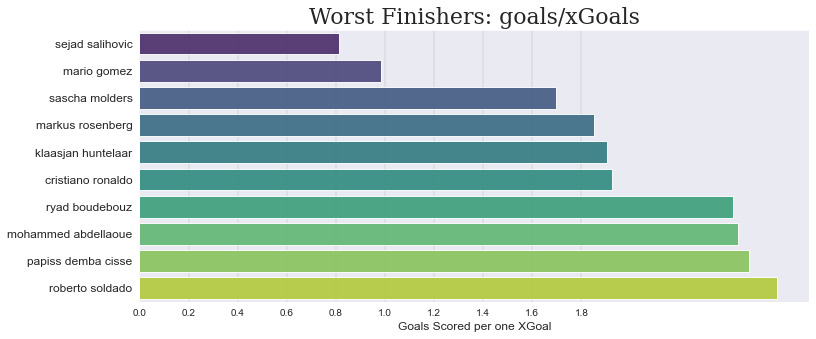

In [53]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=[12,5])
ax = sns.barplot(x=show['ratio'], y=show['player'], palette='viridis', alpha=0.9)
ax.set_xticks(np.arange(0,1.9,0.2))
ax.set_xlabel(xlabel='Goals Scored per one XGoal', fontsize=12)
ax.set_ylabel(ylabel='')
ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=12)
plt.title("Worst Finishers: goals/xGoals", fontsize=22, fontfamily='serif')
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='x')
plt.show()

In [54]:
show = players[['player', 'trueGoals', 'expectedGoals']].sort_values(['expectedGoals'], ascending=False).head(10)
show.head(5)

player  trueGoals  expectedGoals
351      mario gomez          4           4.07
501  sejad salihovic          3           3.70
462             raul          2           2.58
277      juan arango          0           2.54
434   patrick helmes          2           2.36

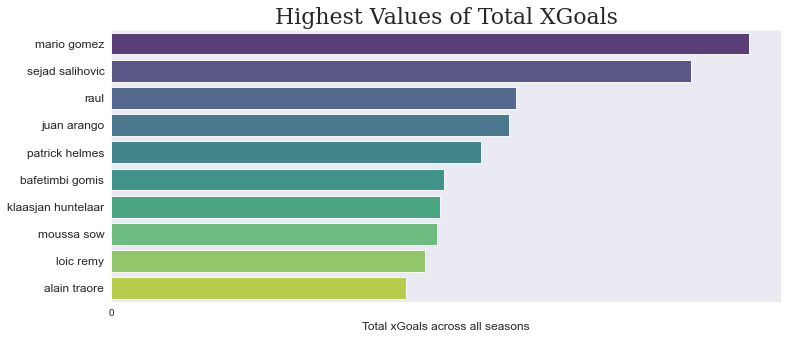

In [55]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=[12,5])
ax = sns.barplot(x=show['expectedGoals'], y=show['player'], palette='viridis', alpha=0.9)
ax.set_xticks(np.arange(0,50,70))
ax.set_xlabel(xlabel='Total xGoals across all seasons', fontsize=12)
ax.set_ylabel(ylabel='')
ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=12)
plt.title("Highest Values of Total XGoals", fontsize=22, fontfamily='serif')
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='x')
plt.show()

In [56]:
players.rename(columns={'event_type': 'n_shots'}, inplace=True)

In [57]:
players['xG_per_shot_ratio'] = players['expectedGoals'] / players['n_shots']
show = players[players['n_shots']>15].sort_values(['xG_per_shot_ratio', 'trueGoals'], ascending=False).reset_index(drop=True)
show['rank'] = show.index+1
show[['rank', 'player', 'xG_per_shot_ratio', 'trueGoals', 'expectedGoals', 'difference']].tail(5)

rank              player  xG_per_shot_ratio  trueGoals  expectedGoals  \
1     2                raul           0.161250          2           2.58   
2     3        alain traore           0.104444          5           1.88   
3     4  papiss demba cisse           0.100625          4           1.61   
4     5   cristiano ronaldo           0.097500          3           1.56   
5     6               cacau           0.056875          2           0.91   

   difference  
1        0.58  
2       -3.12  
3       -2.39  
4       -1.44  
5       -1.09

In [58]:
show = show[['rank', 'player', 'xG_per_shot_ratio', 'trueGoals', 'expectedGoals', 'difference']].head(10)
show.head(5)

rank              player  xG_per_shot_ratio  trueGoals  expectedGoals  \
0     1         mario gomez           0.239412          4           4.07   
1     2                raul           0.161250          2           2.58   
2     3        alain traore           0.104444          5           1.88   
3     4  papiss demba cisse           0.100625          4           1.61   
4     5   cristiano ronaldo           0.097500          3           1.56   

   difference  
0        0.07  
1        0.58  
2       -3.12  
3       -2.39  
4       -1.44

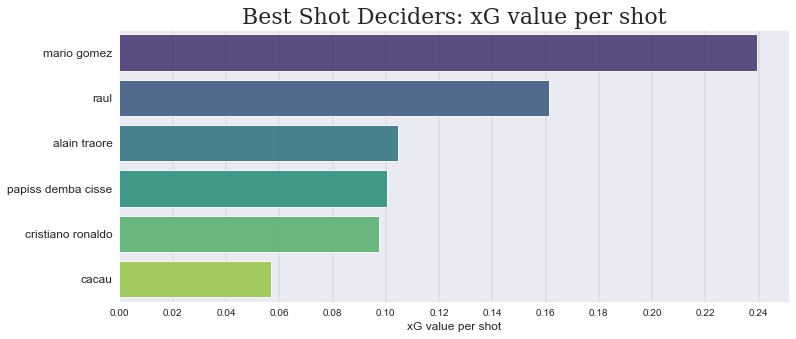

In [59]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=[12,5])
ax = sns.barplot(x=show['xG_per_shot_ratio'], y=show['player'], palette='viridis', alpha=0.9)
ax.set_xticks(np.arange(0,0.25,0.02))
ax.set_xlabel(xlabel='xG value per shot', fontsize=12)
ax.set_ylabel(ylabel='')
ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=12)
plt.title("Best Shot Deciders: xG value per shot", fontsize=22, fontfamily='serif')
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='x')
plt.show()

In [60]:
headers = df_shots[(df_shots.event_type==1) & (df_shots.bodypart==3)]
headers_players = headers.groupby('player').sum().reset_index()
headers_players.rename(columns={'event_type': 'n_headers', 'is_goal': 'trueGoals', 'prediction': 'expectedGoals'}, inplace=True)
headers_players['ratio'] = headers_players['trueGoals'] / headers_players['expectedGoals']
show_headers = headers_players.sort_values(['difference', 'trueGoals']).reset_index(drop=True)
show_headers['rank'] = show_headers.index+1
show_headers[['rank', 'player', 'n_headers', 'trueGoals', 'expectedGoals', 'difference']].head(5)

rank            player  n_headers  trueGoals  expectedGoals  difference
0     1  imanol agirretxe          2          2       0.158588   -1.841412
1     2    sascha molders          4          2       0.328860   -1.671140
2     3         loic remy          3          2       0.378301   -1.621699
3     4   igor de camargo          1          1       0.051698   -0.948302
4     5  markus rosenberg          1          1       0.076034   -0.923966

In [61]:
left_foot = df_shots[(df_shots.event_type==1) & (df_shots.bodypart==2)]
left_foot_players = left_foot.groupby('player').sum().reset_index()
left_foot_players.rename(columns={'event_type': 'n_leftFoot_shots', 'is_goal': 'trueGoals', 'prediction': 'expectedGoals'}, inplace=True)
show_lfoot = left_foot_players.sort_values(['difference', 'trueGoals']).reset_index(drop=True)
show_lfoot['rank'] = show_lfoot.index+1
show_lfoot[['rank', 'player', 'n_leftFoot_shots', 'trueGoals', 'expectedGoals', 'difference']].head(5)

rank               player  n_leftFoot_shots  trueGoals  expectedGoals  \
0     1         alain traore                17          4       1.833087   
1     2  mohammed abdellaoue                 4          3       1.028553   
2     3      geoffrey dernis                 7          2       0.228945   
3     4       ryad boudebouz                 9          3       1.236967   
4     5   papiss demba cisse                 4          2       0.705056   

   difference  
0   -2.166913  
1   -1.971447  
2   -1.771055  
3   -1.763033  
4   -1.294944

In [62]:
left_foot_players['ratio'] = left_foot_players['trueGoals'] / left_foot_players['expectedGoals']
show_lfoot = left_foot_players[left_foot_players['trueGoals']>2].sort_values(['ratio', 'trueGoals'], ascending=False).reset_index(drop=True)
show_lfoot['rank'] = show_lfoot.index+1
show_lfoot[['rank', 'player', 'n_leftFoot_shots', 'trueGoals', 'expectedGoals', 'ratio']].head(5)

rank               player  n_leftFoot_shots  trueGoals  expectedGoals  \
0     1  mohammed abdellaoue                 4          3       1.028553   
1     2       ryad boudebouz                 9          3       1.236967   
2     3         alain traore                17          4       1.833087   
3     4      sejad salihovic                10          3       3.685903   

      ratio  
0  2.916718  
1  2.425288  
2  2.182111  
3  0.813912

In [63]:
right_foot = df_shots[(df_shots.event_type==1) & (df_shots.bodypart==1)]
right_foot_players = right_foot.groupby('player').sum().reset_index()
right_foot_players.rename(columns={'event_type': 'n_rightFoot_shots', 'is_goal': 'trueGoals', 'prediction': 'expectedGoals'}, inplace=True)
show = right_foot_players.sort_values(['difference', 'trueGoals']).reset_index(drop=True)
show['rank'] = show.index+1
show[['rank', 'player', 'n_rightFoot_shots', 'trueGoals', 'expectedGoals', 'difference']].head(5)

rank              player  n_rightFoot_shots  trueGoals  expectedGoals  \
0     1     roberto soldado                  7          4       1.297663   
1     2    mathieu valbuena                  5          2       0.264250   
2     3   souleymane camara                  3          2       0.277785   
3     4  klaasjan huntelaar                  7          3       1.342200   
4     5        brice jovial                  7          2       0.413732   

   difference  
0   -2.702337  
1   -1.735750  
2   -1.722215  
3   -1.657800  
4   -1.586268

In [64]:
right_foot_players['ratio'] = right_foot_players['trueGoals'] / right_foot_players['expectedGoals']
show_rfoot = right_foot_players[right_foot_players['trueGoals']>2].sort_values(['ratio', 'trueGoals'], ascending=False).reset_index(drop=True)
show_rfoot['rank'] = show_rfoot.index+1
show_rfoot[['rank', 'player', 'n_rightFoot_shots', 'trueGoals', 'expectedGoals', 'ratio']].head(5)

rank              player  n_rightFoot_shots  trueGoals  expectedGoals  \
0     1     roberto soldado                  7          4       1.297663   
1     2  klaasjan huntelaar                  7          3       1.342200   
2     3         mario gomez                  8          3       3.040579   

      ratio  
0  3.082463  
1  2.235136  
2  0.986654

In [65]:
right_foot = right_foot_players[right_foot_players['n_rightFoot_shots']>1]
left_foot = left_foot_players[left_foot_players['n_leftFoot_shots']>1]
headers = headers_players[headers_players['n_headers']>1]
all_players = right_foot[['player']].merge(left_foot, on='player', how='inner').merge(headers, on='player', how='inner')                                                                         
all_players_list = list(all_players['player'].unique())


def compare_players(players_list):
    total = right_foot[right_foot['player'].isin(players_list)][['player', 'ratio']]
    total['bodypart']='Right Foot'
    left_foot['bodypart']='Left Foot'
    headers['bodypart']= 'Header'
    total = pd.concat([total, left_foot[left_foot['player'].isin(players_list)][['player', 'ratio', 'bodypart']], headers[headers['player'].isin(players_list)][['player', 'ratio', 'bodypart']]], axis=0)

    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=[15,8])
    ax = sns.barplot(y=total['ratio'], x=total['player'], hue=total['bodypart'], palette='viridis', alpha=0.9)
    #ax.set_yticks(np.arange(0,2.2,0.2))
    ax.set_ylabel(ylabel='Goals per xG Ratio', fontsize=14)
    ax.set_xlabel(xlabel='')
    ax.set_xticklabels(labels=ax.get_xticklabels(), fontsize=15)
    plt.title("Players Comparison", fontsize=24, fontfamily='serif')
    ax.grid(color='black', linestyle='-', linewidth=0.1, axis='y')
    plt.legend(fontsize=12)
    plt.show()

print(all_players_list)

['abdoulrazak boukari', 'adrian ramos', 'cacau', 'cristiano ronaldo', 'gregory pujol', 'kevin gameiro', 'kevin monnetpaquet', 'klaasjan huntelaar', 'lisandro', 'loic remy', 'lucho gonzalez', 'mario gomez', 'martin harnik', 'moussa sow', 'papiss demba cisse', 'patrick helmes', 'raffael', 'raul', 'tomas pekhart', 'yoan gouffran']


C:\Users\Rahul\AppData\Local\Temp/ipykernel_13676/3784612934.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_foot['bodypart']='Left Foot'
C:\Users\Rahul\AppData\Local\Temp/ipykernel_13676/3784612934.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headers['bodypart']= 'Header'


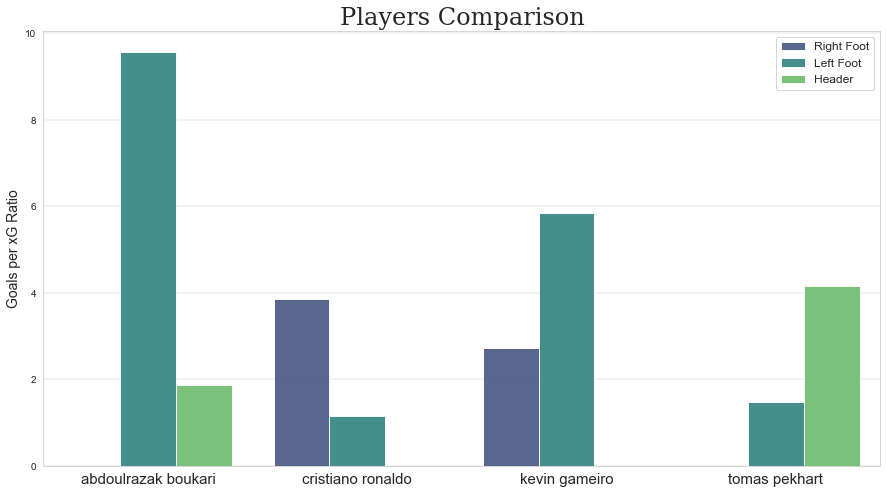

In [66]:
compare_players(players_list = ['abdoulrazak boukari', 'cristiano ronaldo', 'tomas pekhart', 'kevin gameiro'])

C:\Users\Rahul\AppData\Local\Temp/ipykernel_13676/3784612934.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_foot['bodypart']='Left Foot'
C:\Users\Rahul\AppData\Local\Temp/ipykernel_13676/3784612934.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headers['bodypart']= 'Header'


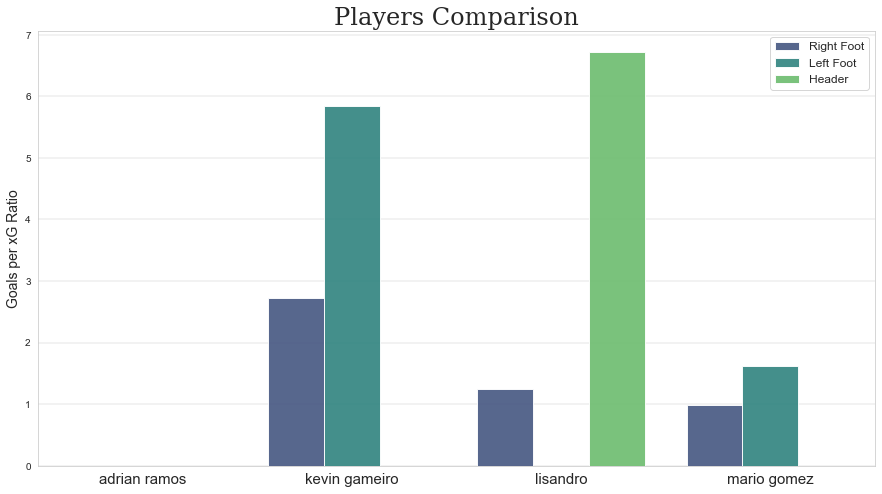

In [67]:
import random
compare_players(random.sample(all_players_list, 4))

In [68]:
outside_box = df_shots[(df_shots.location==15)]
outbox_players = outside_box.groupby('player').sum().reset_index()
outbox_players.rename(columns={'event_type': 'n_outbox_shots', 'is_goal': 'trueGoals', 'prediction': 'expectedGoals'}, inplace=True)
show = outbox_players.sort_values(['difference', 'trueGoals']).reset_index(drop=True)
show['rank'] = show.index+1
show[['rank', 'player', 'n_outbox_shots', 'trueGoals', 'expectedGoals', 'difference']].head(5)

rank             player  n_outbox_shots  trueGoals  expectedGoals  \
0     1       alain traore               8          3       0.282512   
1     2       henri bedimo               1          1       0.026017   
2     3       djamel bakar               2          1       0.033465   
3     4   vincent nogueira               2          1       0.036362   
4     5  kevin grosskreutz               3          1       0.050197   

   difference  
0   -2.717488  
1   -0.973983  
2   -0.966535  
3   -0.963638  
4   -0.949803

In [69]:
show[['rank', 'player', 'n_outbox_shots', 'trueGoals', 'expectedGoals', 'difference']].tail(5)

rank           player  n_outbox_shots  trueGoals  expectedGoals  \
392   393  anthony mounier               6          0       0.264577   
393   394   marcel de jong               6          0       0.276303   
394   395     arjen robben               6          0       0.277599   
395   396     daniel baier               8          0       0.283892   
396   397       aaron hunt               8          0       0.337861   

     difference  
392    0.264577  
393    0.276303  
394    0.277599  
395    0.283892  
396    0.337861

In [70]:
outbox_players['ratio'] = outbox_players['trueGoals'] / outbox_players['expectedGoals']
show = outbox_players[outbox_players['n_outbox_shots']>3].sort_values(['ratio', 'trueGoals'], ascending=False).reset_index(drop=True)
show['rank'] = show.index+1
show = show[['rank', 'player', 'n_outbox_shots', 'trueGoals', 'expectedGoals', 'ratio']].head(10)
show.head(5)

rank              player  n_outbox_shots  trueGoals  expectedGoals  \
0     1  papiss demba cisse               4          1       0.058836   
1     2    mathieu valbuena               4          1       0.066930   
2     3       paulo machado               4          1       0.066930   
3     4          ryan babel               5          1       0.083662   
4     5        alain traore               8          3       0.282512   

       ratio  
0  16.996431  
1  14.941069  
2  14.941069  
3  11.952855  
4  10.619018

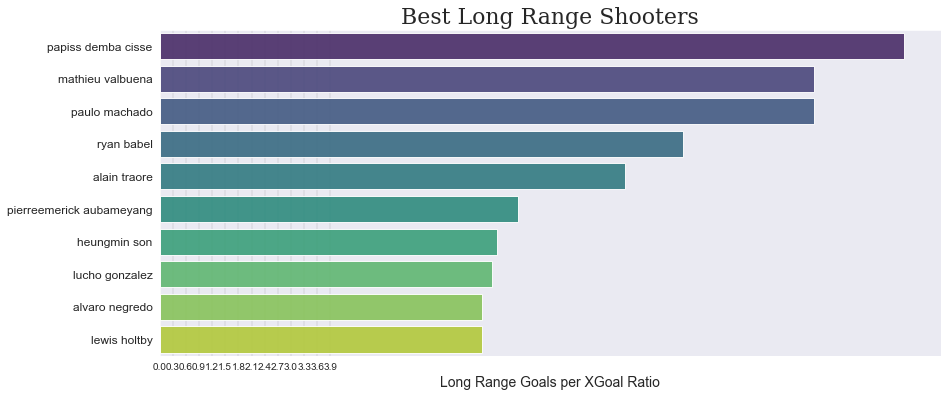

In [71]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=[14,6])
ax = sns.barplot(x=show['ratio'], y=show['player'], palette='viridis', alpha=0.9)
ax.set_xticks(np.arange(0,4,0.3))
ax.set_xlabel(xlabel='Long Range Goals per XGoal Ratio', fontsize=14)
ax.set_ylabel(ylabel='')
ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=12)
plt.title("Best Long Range Shooters", fontsize=22, fontfamily='serif')
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='x')
plt.show()